<a href="https://colab.research.google.com/github/Andres-Gress/EDP_I/blob/main/Polinomios_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**POLINOMIOS DE LEGENDRE**

a) Gráficas de los polinomios de Legendre $ P_n(x) $ para $ n=0,1,2,...5 $

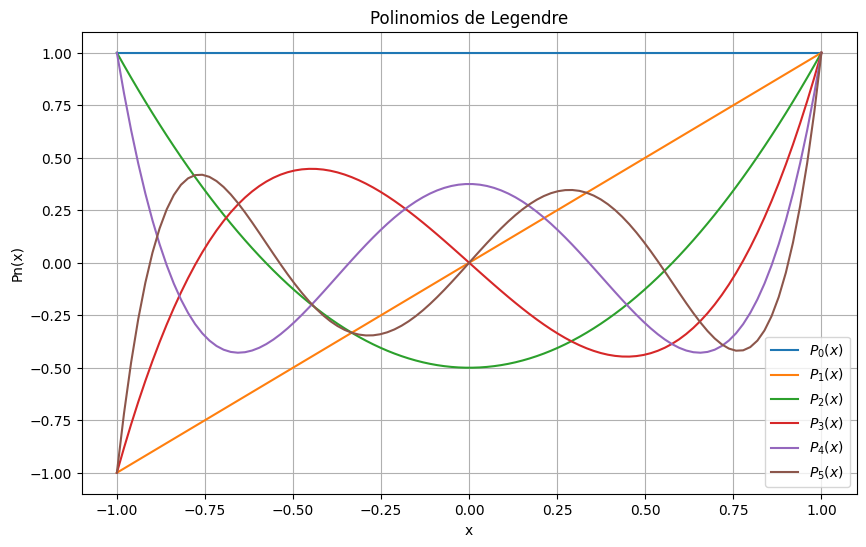

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

x=np.linspace(-1,1,100)

plt.figure(figsize=(10,6))

for n in range(6):
  pn=legendre(n)
  plt.plot(x,pn(x),label=f'$P_{n}(x)$')
plt.title('Polinomios de Legendre')
plt.xlabel('x')
plt.ylabel('Pn(x)')
plt.legend()
plt.grid(True)
plt.show()

Aquí podemos aprecias las 5 graficas de los polinomios de Legendre

b) Gráficamente se satisface la relación $(n=3)$

$(1-x^2)P'_n(x)=(n+1)xP_n(x)-(n+1)P_{n+1}(x)$

Para $n=3$

$(1-x^2)P'_3(x)=(4)xP_3(x)-(4)P_{4}(x)$


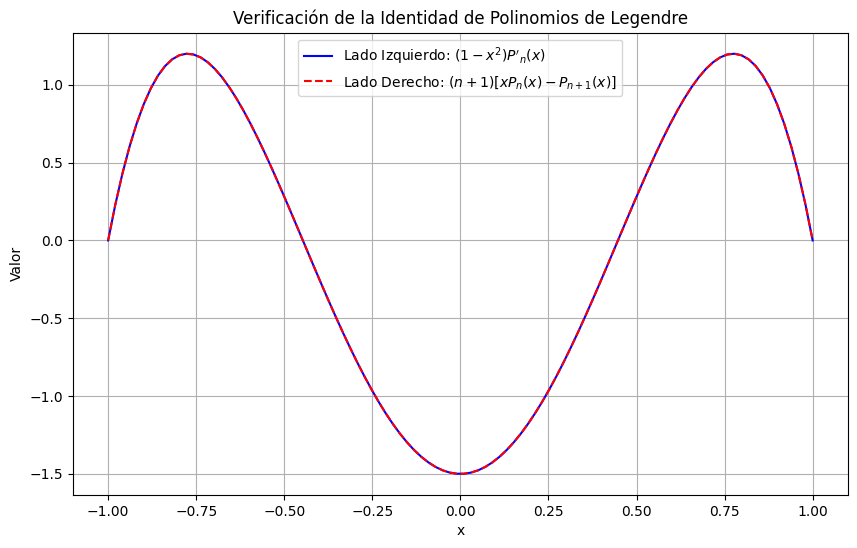

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

n=3

Pn=legendre(n)
Pn1=legendre(n+1)

def derivada(f, x, dx=1e-6):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

ls= lambda x: (1-x**2)*derivada(Pn,x)
rs= lambda x:  (n + 1) * (x * Pn(x) - Pn1(x))

x=np.linspace(-1,1,100)

y_izq = np.array([ls(xi) for xi in x])
y_der = rs(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_izq, label='Lado Izquierdo: $(1 - x^2)P\'_n(x)$', color='blue')
plt.plot(x, y_der, label='Lado Derecho: $(n+1)[xP_n(x) - P_{n+1}(x)]$', color='red', linestyle='--')
plt.title('Verificación de la Identidad de Polinomios de Legendre')
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

Se aprecia que ambas graficas son iguales, ya que una sobrepone a la otra, por lo que la igualdad se cumple

c) Mostrar algebraicamente la relación del inciso b

$(1-x^2)P'_n(x)=(n+1)xP_n(x)-(n+1)P_{n+1}(x)$

Para $n=3$

$(1-x^2)P'_3(x)=(4)xP_3(x)-(4)P_{4}(x)$

In [70]:
import sympy as sp

x = sp.symbols('x')
n=3

Pn=sp.legendre(n,x)
Pn1=sp.legendre(n+1,x)

ls= (1-x**2)*sp.diff(Pn, x)
rs= (n + 1) * (x * Pn - Pn1)

ls_simplificada = sp.simplify(ls)
rs_simplificada = sp.simplify(rs)

print(f'Lado Izquierdo: {ls_simplificada}')
print(f'Lado Derecho: {rs_simplificada}')

Lado Izquierdo: -15*x**4/2 + 9*x**2 - 3/2
Lado Derecho: -15*x**4/2 + 9*x**2 - 3/2


Tanto el lado izquierdo como el lado derecho son iguales

d) Mostrar algebraicamente que se satisface la relación  (para $ n=3 $)

$(n+1)P_{n+1}(x)-(2n+1)xP_n(x)+nP_{n+1}(x)=0$

In [72]:
import sympy as sp

for n in range(4):
  Pn = sp.legendre(n, x)
  Pn1 = sp.legendre(n + 1, x)
  Pn2= sp.legendre(n - 1, x)

  ls = (n + 1) * Pn1 - (2 * n + 1) * x * Pn + n * Pn2

  ls_simplificada = sp.simplify(ls)

  print(f'Para n={n} ls(x) = {ls_simplificada}')


Para n=0 ls(x) = 0
Para n=1 ls(x) = 0
Para n=2 ls(x) = 0
Para n=3 ls(x) = 0


Se comprueba que los polinomios tienden a 0

e) FORMULA DE RODRIGUEZ

para $n=0,1,2,...,5$

$P_n(x)=\frac{1}{2^n n!} \frac{d^n}{dx^n}(x^2-1)^n$

In [97]:
from sympy import factorial

x=sp.symbols('x')

for n in range(6):
  expr = (x**2 - 1)**n
  derivada = sp.diff(expr, x, n)
  rod=(1/(2**n * factorial(n)))*derivada
  legendre_sym=sp.legendre(n,x)
  rod_s=sp.simplify(rod)
  legendre_sym_s=sp.simplify(legendre_sym)
  print(f'RODRIGUEZ n={n} : ', rod_s)
  print(f'LEGENDRE n={n} : ', legendre_sym_s)

RODRIGUEZ n=0 :  1
LEGENDRE n=0 :  1
RODRIGUEZ n=1 :  x
LEGENDRE n=1 :  x
RODRIGUEZ n=2 :  3*x**2/2 - 1/2
LEGENDRE n=2 :  3*x**2/2 - 1/2
RODRIGUEZ n=3 :  x*(5*x**2 - 3)/2
LEGENDRE n=3 :  x*(5*x**2 - 3)/2
RODRIGUEZ n=4 :  35*x**4/8 - 15*x**2/4 + 3/8
LEGENDRE n=4 :  35*x**4/8 - 15*x**2/4 + 3/8
RODRIGUEZ n=5 :  x*(63*x**4 - 70*x**2 + 15)/8
LEGENDRE n=5 :  x*(63*x**4 - 70*x**2 + 15)/8


Tanto Rodriguez como Legendre arrojan los mismos resultados